In [163]:
from tensorflow import keras
keras.__version__

'2.7.0'

In [164]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [165]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

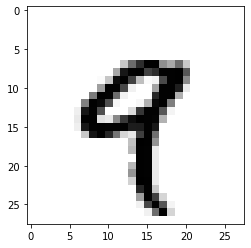

In [166]:
import matplotlib.pyplot as plt
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [167]:
train_images.shape

(60000, 28, 28)

In [168]:
train_labels[4]

9

In [169]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax')) #분류모델은 'sigmoid' 멀티클래스 'softmax' #회귀모델인 경우 'linear'

In [170]:
# 모델 형성시 필요한 조건
# 1. 가운데 정보가 가장 많아야 한다(사진같이)
# 2. 이미지는 공간적으로  픽셀같에 커릴레이션?(연관성?) 정보를 유지할 수 있어야한다.
# 3. 각각의 채널의 방향은 독립이다.
# 4. 이미지는 이미지자체의 배열정보도 같이 저장해야한다.
# 5. 딥러닝 모델은 모든 layer를 학습할 필요 없다 개개소 layer만 재학습돌려도 잘 작동

In [171]:
785*512

401920

In [172]:
network.summary() # 모든 학습파라메타 407050, 학습가능 407050 학습 불가능 0

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               401920    
                                                                 
 dense_20 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [173]:
ly0=network.layers[0]
ly0.weights
w1 = ly0.weights[0]
b1 = ly0.weights[1]

w1.shape, b1.shape #입력사이즈 512, 출력사이즈 10

(TensorShape([784, 512]), TensorShape([512]))

In [174]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [175]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [176]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [177]:
train_labels.shape

(60000, 10)

In [178]:
hist = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2608 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1042 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0506 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0377 - accuracy: 0.9883


In [179]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9800


In [180]:
print('test_acc:', test_acc)

test_acc: 0.9800000190734863


In [181]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target

In [182]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, 
random_state=2022, test_size=0.3)

In [184]:
X_train.shape

(105, 4)

In [185]:
import tensorflow as tf
from tensorflow.keras import models
model = models.Sequential()
model.add(tf.keras.layers.Dense(units=6, input_dim = X_train.shape[1], 
activation='tanh'))


In [186]:
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [187]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 6)                 30        
                                                                 
 dense_22 (Dense)            (None, 3)                 21        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [188]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)


In [189]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy')

In [190]:
label_tr = tf.keras.utils.to_categorical(y_train)

In [191]:
history = model.fit(X_train, label_tr, batch_size=16, epochs=20)

Epoch 1/20
7/7 [==============================] - 0s 997us/step - loss: 1.3825
Epoch 2/20
7/7 [==============================] - 0s 994us/step - loss: 1.0630
Epoch 3/20
7/7 [==============================] - 0s 831us/step - loss: 1.0286
Epoch 4/20
7/7 [==============================] - 0s 831us/step - loss: 0.8863
Epoch 5/20
7/7 [==============================] - 0s 1ms/step - loss: 0.7210
Epoch 6/20
7/7 [==============================] - 0s 997us/step - loss: 0.6137
Epoch 7/20
7/7 [==============================] - 0s 1ms/step - loss: 0.5210
Epoch 8/20
7/7 [==============================] - 0s 998us/step - loss: 0.4609
Epoch 9/20
7/7 [==============================] - 0s 1ms/step - loss: 0.4048
Epoch 10/20
7/7 [==============================] - 0s 1ms/step - loss: 0.3724
Epoch 11/20
7/7 [==============================] - 0s 831us/step - loss: 0.3425
Epoch 12/20
7/7 [==============================] - 0s 997us/step - loss: 0.3101
Epoch 13/20
7/7 [==============================] - 0s 997

In [192]:
y_test = to_categorical(y_test)
model.evaluate(X_test, y_test)


2/2 [==============================] - 0s 996us/step - loss: 0.2314


0.2313658446073532

In [193]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [194]:
X_train.shape[1]

13

In [195]:
from tensorflow.keras import Sequential
import tensorflow.keras.layers as lp
net = Sequential()
net.add(tensorflow.keras.layers.Dense(25, activation='relu', input_dim =X_train.shape[1]))

In [196]:
net.add(lp.Dense(6, activation='relu'))
net.add(lp.Dense(2,activation='linear'))

In [197]:
net.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 25)                350       
                                                                 
 dense_24 (Dense)            (None, 6)                 156       
                                                                 
 dense_25 (Dense)            (None, 2)                 14        
                                                                 
Total params: 520
Trainable params: 520
Non-trainable params: 0
_________________________________________________________________


In [198]:
#def mse(y, p):
    return np.square(y - p).mean()

#def mae(y, p):
    return np.abs(y - p).mean()

IndentationError: unexpected indent (<ipython-input-198-8ca88a334cfc>, line 2)

In [199]:
net.compile('adam','mse', ['mae'])
hist = net.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
24/24 [==============================] - 0s 5ms/step - loss: 20625.7129 - mae: 105.2538 - val_loss: 9710.7754 - val_mae: 72.1924
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 6383.4619 - mae: 58.7697 - val_loss: 4789.2588 - val_mae: 52.3181
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 3676.4719 - mae: 46.1120 - val_loss: 2915.5679 - val_mae: 42.0534
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 2248.2773 - mae: 37.2947 - val_loss: 1810.1398 - val_mae: 34.2946
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 1369.4697 - mae: 30.3526 - val_loss: 1095.5061 - val_mae: 27.9630
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 818.2159 - mae: 24.7642 - val_loss: 708.9077 - val_mae: 23.4407
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 618.5723 - mae: 22.0561 - val_loss: 635.7988 - val_mae: 22.1886
Epoch 8/50
24/24 [==================

In [ ]:
net.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 32.4376 - mae: 4.0528


[32.43758773803711, 4.052781105041504]

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target
)

In [ ]:
X_train.shape[1]

(331, 10)

In [ ]:
from tensorflow.keras import Sequential
model = Sequential()
model.add(tensorflow.keras.layers.Dense(6, activation='relu',input_dim=X_train.shape[1]))

In [ ]:
model.add(tensorflow.keras.layers.Dense(3, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 6)                 66        
                                                                 
 dense_18 (Dense)            (None, 3)                 21        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile('adam', 'mse', ['mae'])
model.fit(X_train, y_train, epochs=50, batch_size=12, validation_data=(X_test, y_test))


Epoch 1/50
28/28 [==============================] - 0s 5ms/step - loss: 30167.3691 - mae: 154.7919 - val_loss: 25784.9277 - val_mae: 144.0981
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: 30150.2656 - mae: 154.7375 - val_loss: 25768.2969 - val_mae: 144.0408
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: 30130.6172 - mae: 154.6746 - val_loss: 25748.0059 - val_mae: 143.9712
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 30106.7344 - mae: 154.5997 - val_loss: 25723.9004 - val_mae: 143.8889
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: 30079.2988 - mae: 154.5122 - val_loss: 25696.2383 - val_mae: 143.7945
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 30047.9570 - mae: 154.4131 - val_loss: 25665.0039 - val_mae: 143.6880
Epoch 7/50
28/28 [==============================] - 0s 2ms/step - loss: 30012.5195 - mae: 154.3034 - val_loss: 25631.1289 - val_mae: 143.5725
Epoch 